In [523]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### В данной работе представлен исследовательский анализ бухгалтерской отчетности компаний среднего бизнеза на предмет выполнения закона Бенфорда.

#### Закон Бенфорда, или закон первой цифры — закон, описывающий вероятность появления определённой первой значащей цифры в распределениях величин, взятых из реальной жизни.

**Данные для анализа взяты с сайта https://www.audit-it.ru/buh_otchet/7714266785_ao-monolit-fundamentstroy по бухгалтерской отчности компаний**

### 1. **Возьмем данные о движении денежных средств и финансового результата предприятия ООО "ЛЕБЕДЯНЬМОЛОКО"**
**На примере одного предприятия посмотрим выполнение закона бенфорда, далее составим несколько выборок предприятий и проведем анализ.**

In [525]:
df1 = pd.read_csv('D:\Desktop\Тестовые\Train\Лебедянь.csv', sep=';', decimal=',')

**Данные с отрицательными числами поменяем на положительные** \
**А также удалим пустые значения**

In [526]:
df1.dropna(inplace=True)

In [527]:
df1.head()

,Код,2022
0,2110.0,9555647.0
1,2120.0,-7260021.0
2,2100.0,2295626.0
3,2210.0,-1028113.0
4,2220.0,-173801.0


In [528]:
df1['2022'] = df1['2022'].abs()

### 2. Выделим первую цифру каждого числа, сформируем выборку Y

In [529]:
df1['Y'] = df1['2022'].astype(str).str[0].astype(int)

In [530]:
df1['Y'].head()

0    9
1    7
2    2
3    1
4    1
Name: Y, dtype: int32

In [531]:
df1 = df1[df1['Y']!=0]

In [532]:
Y = df1['Y'].value_counts()
Y.sort_index(inplace=True)
all_digits = pd.Series(range(10))
Y = all_digits.map(Y).fillna(0).astype(int)
Y = Y[1:]

### 3 Частоты цифр

Text(0.5, 1.0, 'Частота встречаемости каждой цифры')

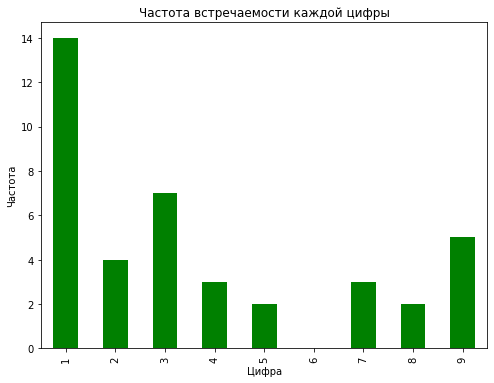

In [533]:
plt.figure(figsize=(8, 6))
Y.plot(kind='bar',color='g')
plt.xlabel('Цифра')
plt.ylabel('Частота')
plt.title('Частота встречаемости каждой цифры')

### 4. Создаем массив P с относительной частотой встречаемости цифр

In [534]:
P = Y.values/len(df1)

In [535]:
P

array([0.35 , 0.1  , 0.175, 0.075, 0.05 , 0.   , 0.075, 0.05 , 0.125])

### 5. Создаем массив Q c вероятностями распределения закона Бенфорда

In [536]:
Q = np.log10(Y.index+1) - np.log10(Y.index)
Q

Index([  0.3010299956639812,  0.17609125905568124,  0.12493873660829996,
        0.09691001300805646,  0.07918124604762478,  0.06694678963061318,
       0.057991946977686726,  0.05115252244738133,  0.04575749056067513],
      dtype='float64')

$$Q_k = lg ( k +1 )− lg k, k = 1,2 , ... , 9$$

### 6. Проведем графическую оценку выполнения закона Бенфорда

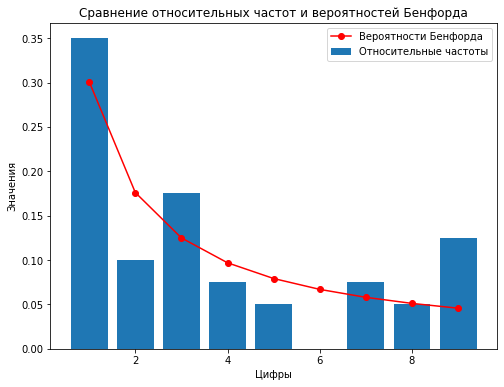

In [537]:
plt.figure(figsize=(8, 6))
plt.bar(Y.index, P, label='Относительные частоты')
plt.plot(Y.index, Q, color='r', marker='o', label='Вероятности Бенфорда');
plt.xlabel('Цифры')
plt.ylabel('Значения')
plt.title('Сравнение относительных частот и вероятностей Бенфорда')
plt.legend()
plt.show();

**Можем убедиться на выполнение закона, с небольшим допущением( в виду отсутствия некоторых цифр в нашей выборке) что данные сответствуют закону Бенфорда, однако присутствуют некоторые расхождения, что указывает нам на дальнейшее исследование данной компании и выяснения причин отклонения от закона.**

### 6*. Будем оценивать близость с помощью метрик:
**энтропия Кульбака-Лейблера** \
**метрика полной вариации**

In [403]:
def kl_divergence(p, q):
    q = np.where(q == 0, 1e-12, q)
    p = np.where(p == 0, 1e-12, p)
    return np.sum(p * np.log(p / q))

def total_variation_distance(p, q):
    return np.sum(np.abs(p - q))

In [404]:
d1 = kl_divergence(P,Q)
d2 = total_variation_distance(P,Q)

In [455]:
print(f'энтропия Кульбака-Лейблера: {d1} \nметрика полной вариации: {d2}')

энтропия Кульбака-Лейблера: 0.1566995534359611 
метрика полной вариации: 0.39056366037871393


### Сформируем несколько выборок по бухгалтерским отчетностям 10 компаний и составим матрицу метрик

In [406]:
def Metrics(df):
    df.dropna(inplace=True)
    df['2022'] = df['2022'].abs()
    df['Y'] = df['2022'].astype(str).str[0].astype(int)
    df = df[df['Y']!=0]
    Y = df['Y'].value_counts()
    Y.sort_index(inplace=True)
    all_digits = pd.Series(range(10))
    Y = all_digits.map(Y).fillna(0).astype(int)
    Y = Y[1:]
    P = Y.values/len(df1)
    Q = np.log10(Y.index+1) - np.log10(Y.index)
    d1 = kl_divergence(P,Q)
    d2 = total_variation_distance(P,Q)
    return [d1, d2]

In [456]:
def Plot_distr(df):
    df.dropna(inplace=True)
    df['2022'] = df['2022'].abs()
    df['Y'] = df['2022'].astype(str).str[0].astype(int)
    df = df[df['Y']!=0]
    Y = df['Y'].value_counts()
    Y.sort_index(inplace=True)
    all_digits = pd.Series(range(10))
    Y = all_digits.map(Y).fillna(0).astype(int)
    Y = Y[1:]
    P = Y.values/len(df1)
    Q = np.log10(Y.index+1) - np.log10(Y.index)
    d1 = kl_divergence(P,Q)
    d2 = total_variation_distance(P,Q)
    plt.figure(figsize=(8, 6))
    plt.bar(Y.index, P, label='Относительные частоты')
    plt.plot(Y.index, Q, color='r', marker='o', label='Вероятности Бенфорда');
    plt.xlabel('Цифры')
    plt.ylabel('Значения')
    plt.title('Сравнение относительных частот и вероятностей Бенфорда')
    plt.legend()
    plt.show();

### 7. Получаем массив расстояний для выборок

In [427]:
import os

In [428]:
X_train = []

In [429]:
folder_path = 'D:\Desktop\Тестовые\Train'

In [430]:
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        
        df = pd.read_csv(file_path, sep=';', decimal=',')
        
        metrics = Metrics(df)
        
        X_train.append([file_name] + metrics)

In [431]:
X_train = pd.DataFrame(X_train, columns=['Компания', 'KL', 'Полная_Вариация'])

In [432]:
X_train

,Компания,KL,Полная_Вариация
0,Замания.csv,0.126897,0.243697
1,Лебедянь.csv,0.156700,0.390564
2,Рехау.csv,0.228322,0.456548
3,Синимекс.csv,-0.001922,0.341229
4,Сомекс.csv,0.302607,0.476937
5,СпектрумХ.csv,0.161009,0.381425
6,Финам.csv,0.058872,0.489455


### 8. Проводим кластерный анализ с помощью метода kNN(ближайших соседей)

In [490]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [491]:
X = X_train[['KL','Полная_Вариация']]
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [492]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit(X)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 9. Получаем метки класса

In [493]:
labels = kmeans.labels_
labels

array([0, 2, 1, 0, 1, 2, 2])

In [494]:
company_names = X_train['Компания'].values

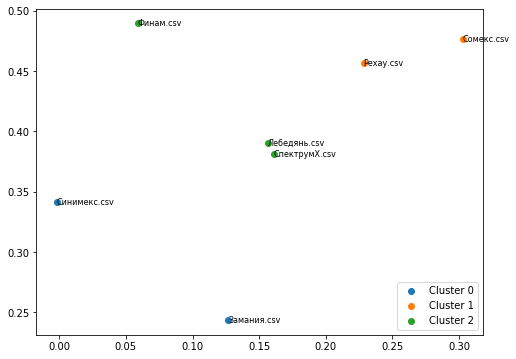

In [495]:
plt.figure(figsize=(8, 6))
for cluster_label in set(labels):
    cluster_data = X_train[labels == cluster_label]
    plt.scatter(cluster_data['KL'], cluster_data['Полная_Вариация'], label=f'Cluster {cluster_label}')
    plt.legend(loc='lower right')
    for index, point in cluster_data.iterrows():
            plt.text(point['KL'], point['Полная_Вариация'], company_names[index], fontsize=8, ha='left', va='center')

In [496]:
labels[labels == 1] = -1
labels[labels == 0] = 1
labels[labels == 2] = 0
labels

array([ 1,  0, -1,  1, -1,  0,  0])

### 10. Обучим модель Байесовского классификатора

In [497]:
from sklearn.naive_bayes import GaussianNB

In [498]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train[['KL','Полная_Вариация']], labels)

GaussianNB()

### 11. Построим предсказание с помощью модели Байесовского классификатора на данных новой компании ООО Монолит

In [518]:
test = pd.read_csv('D:\Desktop\Тестовые\Тест\Монолит.csv', sep=';', decimal=',')

In [519]:
metrics = [Metrics(test)]

In [520]:
metrics

[[0.11230958266182609, 0.29765397507286107]]

In [521]:
predicted = naive_bayes.predict(metrics)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [522]:
print(f'Предсказанный класс моделью : {predicted}')
if predicted==1:
    print('кластер с достоверной информацией')
elif predicted==0:
    print('кластер с данными, соответствующими неопределенному статусу')
else:
    print('кластер с недостоверной информацией')

Предсказанный класс моделью : [1]
кластер с достоверной информацией


### Можем посмотреть на распределение первых цифр тестовой компании, чтобы удостовериться в расчетах модели

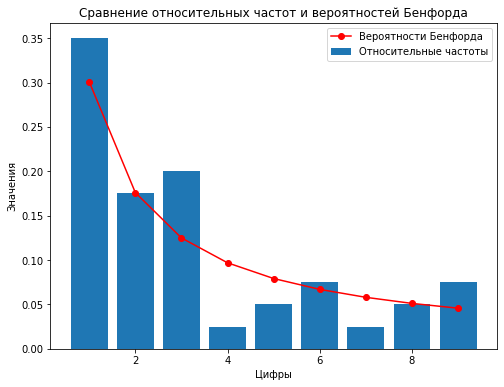

In [504]:
Plot_distr(test)

### Визуально закон Бенфорда выполняется, однако наша тестовая компания находится возле границы неопределенности по метрикам. Мы можем утверждать что алгоритм классфикации работает и с помощью закона Бенфорда можно проводить проверку компаний на предмет недостоверных данных. Данный метод помогает классифицировать такие компании и в случае невыполнения закона, проводить дальнейшее исследование.